#  🏗️ Análise Exploratória - Projetos de Construção Civil
# 
# **Objetivo:** Analisar projetos DWG/PDF para entender padrões e preparar dados para IA




# 1. Configuração Inicial

In [34]:
# Importando bibliotecas necessárias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Adicionar caminho para importar módulos próprios
sys.path.append('..')

# 2. Análise da Estrutura de Projetos

In [35]:
def explorar_projetos(pasta_projetos):
    """Explora a estrutura de arquivos dos projetos"""
    pasta = Path(pasta_projetos)
    
    print("📁 ESTRUTURA DE PROJETOS ENCONTRADA:")
    print("=" * 50)
    
    extensoes = {}
    projetos_por_tipo = {}
    
    for arquivo in pasta.rglob('*'):
        if arquivo.is_file():
            extensao = arquivo.suffix.lower()
            extensoes[extensao] = extensoes.get(extensao, 0) + 1
            
            # Agrupar por tipo de projeto
            if 'arquitetura' in arquivo.parent.name.lower():
                projetos_por_tipo['arquitetura'] = projetos_por_tipo.get('arquitetura', 0) + 1
            elif 'elétrica' in arquivo.parent.name.lower() or 'eletrica' in arquivo.parent.name.lower():
                projetos_por_tipo['elétrica'] = projetos_por_tipo.get('elétrica', 0) + 1
            elif 'hidráulica' in arquivo.parent.name.lower() or 'hidraulica' in arquivo.parent.name.lower():
                projetos_por_tipo['hidráulica'] = projetos_por_tipo.get('hidráulica', 0) + 1
    
    return extensoes, projetos_por_tipo

# 🔍 DIAGNÓSTICO DE CAMINHOS

In [36]:
print("🔍 INICIANDO DIAGNÓSTICO DE ARQUIVOS...")
print("=" * 60)

# Verifica estrutura atual
pasta_atual = Path(".")
print(f"📁 PASTA ATUAL DO NOTEBOOK: {pasta_atual.absolute()}")

# Lista o que existe
print("\n📂 CONTEÚDO DA PASTA ATUAL:")
for item in pasta_atual.iterdir():
    tipo = "📁" if item.is_dir() else "📄"
    print(f"  {tipo} {item.name}")

# Verifica data/raw especificamente
pasta_alvo = Path("data/raw")
print(f"\n🎯 VERIFICANDO: {pasta_alvo.absolute()}")

if pasta_alvo.exists():
    pdfs = list(pasta_alvo.glob("*.pdf"))
    print(f"✅ ENCONTRADO: {len(pdfs)} PDFs")
    for i, pdf in enumerate(pdfs, 1):
        print(f"   {i}. {pdf.name}")
    
    # Se não encontrou PDFs, mostra o que tem
    if len(pdfs) == 0:
        print("   📝 Outros arquivos encontrados:")
        for arquivo in pasta_alvo.glob("*"):
            print(f"      - {arquivo.name}")
else:
    print("❌ PASTA NÃO ENCONTRADA!")
    print("💡 Verifique se os arquivos estão em: data/raw/")

print("\n" + "=" * 60)

🔍 INICIANDO DIAGNÓSTICO DE ARQUIVOS...
📁 PASTA ATUAL DO NOTEBOOK: c:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks

📂 CONTEÚDO DA PASTA ATUAL:
  📄 01_analise_exploratoria.ipynb
  📄 02_teste_modelos_ia.ipynb
  📄 utils.py
  📄 _init_.py

🎯 VERIFICANDO: c:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\notebooks\data\raw
❌ PASTA NÃO ENCONTRADA!
💡 Verifique se os arquivos estão em: data/raw/



# ✅ EXECUTAR ANÁLISE

In [37]:
print("🎯 INICIANDO ANÁLISE DOS PROJETOS...")

# Tenta primeiro o caminho relativo
pasta_projetos = "data/raw"
pasta_path = Path(pasta_projetos)

if pasta_path.exists() and any(pasta_path.glob("*.pdf")):
    print(f"✅ Usando caminho relativo: {pasta_path.absolute()}")
else:
    # Se não funcionar, tenta caminho absoluto
    caminho_absoluto = r"C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\data\raw"
    pasta_path = Path(caminho_absoluto)
    if pasta_path.exists():
        print(f"✅ Usando caminho absoluto: {caminho_absoluto}")
        pasta_projetos = caminho_absoluto
    else:
        print("❌ Nenhum caminho funcionou! Verifique a localização dos arquivos.")
        pasta_projetos = None

# Executa análise se encontrou arquivos
if pasta_projetos:
    extensoes, projetos_tipo = explorar_projetos(pasta_projetos)

    print("📊 ESTATÍSTICAS DE ARQUIVOS:")
    for ext, count in extensoes.items():
        print(f"  {ext}: {count} arquivos")

    print("\n🏗️ PROJETOS POR DISCIPLINA:")
    for tipo, count in projetos_tipo.items():
        print(f"  {tipo}: {count} projetos")
else:
    print("⚠️  Não foi possível acessar os arquivos PDF.")

🎯 INICIANDO ANÁLISE DOS PROJETOS...
✅ Usando caminho absoluto: C:\Users\User\OneDrive - Questindustries\Projetos Python\Plataforma Quantitativos\data\raw
📁 ESTRUTURA DE PROJETOS ENCONTRADA:
📊 ESTATÍSTICAS DE ARQUIVOS:
  .pdf: 16 arquivos

🏗️ PROJETOS POR DISCIPLINA:


# 3. Análise de PDFs - Padrões de Texto

In [38]:
# 3. Análise de PDFs - Padrões de Texto (VERSÃO MELHORADA)
from PyPDF2 import PdfReader
import re
from collections import Counter

def analisar_pdfs_melhorada(pasta_pdfs, max_arquivos=5):
    """Analisa PDFs com padrões mais flexíveis"""
    pasta = Path(pasta_pdfs)
    pdfs = list(pasta.rglob('*.pdf'))[:max_arquivos]
    
    padroes_comuns = []
    todos_materiais = []
    estatisticas_pdfs = {}
    
    print(f"🔍 ANALISANDO {len(pdfs)} PDFs COM PADRÕES MELHORADOS...")
    
    for i, pdf_path in enumerate(pdfs):
        print(f"  {i+1}. {pdf_path.name}")
        estatisticas_pdfs[pdf_path.name] = {'paginas': 0, 'texto_encontrado': False}
        
        try:
            # Extrair texto
            reader = PdfReader(pdf_path)
            texto = ""
            for pagina in reader.pages:
                texto_pagina = pagina.extract_text()
                texto += texto_pagina + " "
            
            estatisticas_pdfs[pdf_path.name]['paginas'] = len(reader.pages)
            estatisticas_pdfs[pdf_path.name]['texto_encontrado'] = len(texto.strip()) > 0
            
            # VERIFICAR SE TEM TEXTO EXTRAÍDO
            if len(texto.strip()) == 0:
                print(f"    ⚠️  PDF PODE SER SCANNED - SEM TEXTO EXTRAÍDO")
                continue
                
            print(f"    📄 Texto extraído: {len(texto)} caracteres")
            
            # PADRÕES MELHORADOS - MAIS FLEXÍVEIS
            padroes = [
                # Padrão quantidade + material
                r'(\d+[,.]?\d*)\\s*(tubos?|canos?|conexões?|registros?|válvulas?)\\s*(PVC|aço|ferro|CPVC|galvanizado|inox)?',
                r'(\d+[,.]?\d*)\\s*(caixas?)\\s*(de\\s+luz|de\\s+passagem|inspeção|gordura)',
                r'(\d+[,.]?\d*)\\s*(blocos?|tijolos?)\\s*(cerâmicos?|concreto|vedação|concreto)',
                r'(\d+[,.]?\d*)\\s*(portas?|janelas?)\\s*(\\d+x\\d+)?',
                r'(\d+[,.]?\d*)\\s*(lâmpadas?|luminárias?|spots?|refletores?)',
                r'(\d+[,.]?\\d*)\\s*(metros?|m\\s*)\\.?\\s*(de\\s+[^,\\.]+)',
                r'(\d+[,.]?\\d*)\\s*(fios?|cabos?)\\s*(\\d+mm²)?',
                
                # Padrões apenas com números e unidades
                r'(\\d+[,.]?\\d*)\\s*(un|UN|Un)\\.?',
                r'(\\d+[,.]?\\d*)\\s*(m²?|m2)',
                r'(\\d+[,.]?\\d*)\\s*(kg|ton)',
                
                # Material seguido de quantidade
                r'(tubo|cano|conexão|registro|válvula)\\s*(PVC|aço|ferro)?\\s*(\\d+[,.]?\\d*)',
            ]
            
            matches_encontrados = 0
            for padrao in padroes:
                matches = re.finditer(padrao, texto, re.IGNORECASE)
                for match in matches:
                    matches_encontrados += 1
                    material = {
                        'arquivo': pdf_path.name,
                        'padrao_completo': match.group(0),
                        'quantidade': match.group(1) if match.groups() else '',
                        'material': match.group(2) if len(match.groups()) > 1 else match.group(0),
                        'especificacao': match.group(3) if len(match.groups()) > 2 else '',
                        'tipo_padrao': 'quantidade_material'
                    }
                    padroes_comuns.append(material)
                    
                    material_nome = material['material'].lower() if material['material'] else 'desconhecido'
                    todos_materiais.append(material_nome)
            
            estatisticas_pdfs[pdf_path.name]['matches'] = matches_encontrados
            print(f"    ✅ Padrões encontrados: {matches_encontrados}")
                    
        except Exception as e:
            print(f"    ❌ Erro ao processar {pdf_path.name}: {e}")
    
    # ANÁLISE DOS RESULTADOS
    print(f"\n📊 RESUMO DA ANÁLISE:")
    for pdf, stats in estatisticas_pdfs.items():
        status = "✅ COM TEXTO" if stats['texto_encontrado'] else "❌ SEM TEXTO/SCANNED"
        matches = stats.get('matches', 0)
        print(f"  {pdf}: {status} | {matches} padrões | {stats['paginas']} páginas")
    
    return padroes_comuns, todos_materiais, estatisticas_pdfs

# EXECUTAR ANÁLISE MELHORADA
print("🎯 EXECUTANDO ANÁLISE MELHORADA...")
padroes_encontrados, materiais, estatisticas = analisar_pdfs_melhorada(pasta_projetos)   
print("\n✅ ANÁLISE CONCLUÍDA.") 
                

🎯 EXECUTANDO ANÁLISE MELHORADA...
🔍 ANALISANDO 5 PDFs COM PADRÕES MELHORADOS...
  1. Projeto arquitetura Legal Cartão Joinville.pdf


Multiple definitions in dictionary at byte 0x674b3 for key /PageMode


    📄 Texto extraído: 6070 caracteres
    ✅ Padrões encontrados: 0
  2. PROJETO AS CANOAS aprovado Bianca 21.07.2022.pdf
    📄 Texto extraído: 1604 caracteres
    ✅ Padrões encontrados: 0
  3. PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout1.pdf
    📄 Texto extraído: 7719 caracteres
    ✅ Padrões encontrados: 0
  4. PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout2.pdf
    📄 Texto extraído: 4308 caracteres
    ✅ Padrões encontrados: 0
  5. PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout3.pdf
    📄 Texto extraído: 4233 caracteres
    ✅ Padrões encontrados: 0

📊 RESUMO DA ANÁLISE:
  Projeto arquitetura Legal Cartão Joinville.pdf: ✅ COM TEXTO | 0 padrões | 3 páginas
  PROJETO AS CANOAS aprovado Bianca 21.07.2022.pdf: ✅ COM TEXTO | 0 padrões | 1 páginas
  PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout1.pdf: ✅ COM TEXTO | 0 padrões | 1 páginas
  PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout2.pdf: ✅ COM TEXTO | 0 padrões | 1 páginas
  PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-La

# 4. Visualização dos Dados

C:\Users\User\AppData\Local\Temp\ipykernel_8652\333917906.py:11: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_8652\333917906.py:11: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


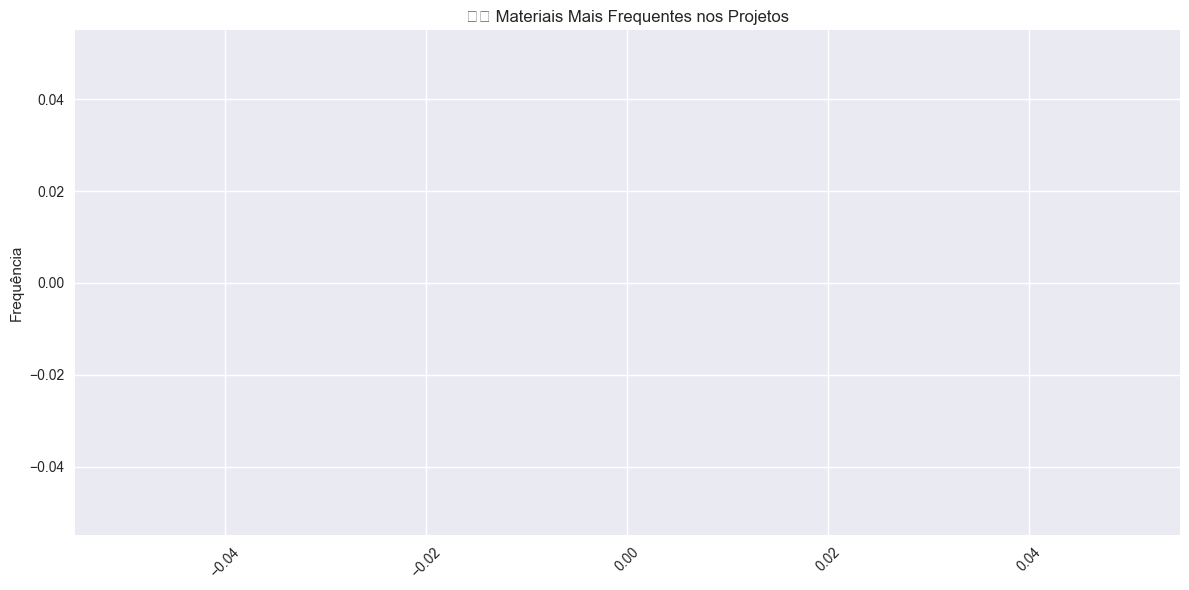

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


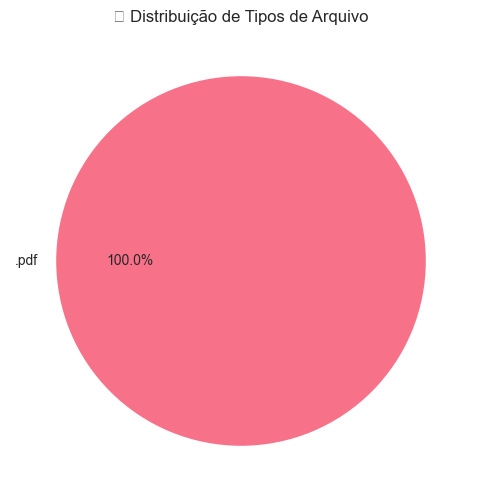

In [39]:
# Contagem de materiais mais comuns
contagem_materiais = Counter(materiais)

# GRÁFICO 1: Materiais mais frequentes
plt.figure(figsize=(12, 6))
materiais_top = dict(contagem_materiais.most_common(10))
plt.bar(materiais_top.keys(), materiais_top.values())
plt.title('🏗️ Materiais Mais Frequentes nos Projetos')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


# GRÁFICO 2: Tipos de arquivo
plt.figure(figsize=(8, 6))
plt.pie(extensoes.values(), labels=extensoes.keys(), autopct='%1.1f%%')
plt.title('📊 Distribuição de Tipos de Arquivo')
plt.show()

# 5. Análise de Padrões Específicos

In [40]:
def criar_dataframe_analise(padroes):
    """Cria DataFrame para análise detalhada"""
    df = pd.DataFrame(padroes)
    
    if not df.empty:
        # Estatísticas básicas
        print("📈 ESTATÍSTICAS DOS MATERIAIS IDENTIFICADOS:")
        print(f"  Total de itens encontrados: {len(df)}")
        print(f"  Materiais únicos: {df['material'].nunique()}")
        print(f"  Arquivos analisados: {df['arquivo'].nunique()}")
        
        # Top materiais
        print("\n🏆 TOP 5 MATERIAIS:")
        top_materiais = df['material'].value_counts().head(5)
        for material, count in top_materiais.items():
            print(f"  {material}: {count} ocorrências")
    
    return df


# CRIAR DATAFRAME COM RESULTADOS
df_materiais = criar_dataframe_analise(padroes_encontrados)

# 6. Exportar Resultados

In [41]:
# Salvar análise em CSV
if not df_materiais.empty:
    df_materiais.to_csv('../data/processed/analise_exploratoria.csv', index=False, encoding='utf-8')
    print("💾 Análise salva em: ../data/processed/analise_exploratoria.csv")

# %%
# Gerar relatório de insights
print("\n🎯 INSIGHTS E PRÓXIMOS PASSOS:")
print("=" * 40)

if not df_materiais.empty:
    print("1. Materiais mais promissores para automatizar:")
    for material in df_materiais['material'].value_counts().head(3).index:
        print(f"   ✅ {material}")
    
    print("\n2. Recomendações:")
    print("   • Focar nos padrões mais frequentes")
    print("   • Criar regex específicos para top materiais")
    print("   • Validar com projetos de diferentes disciplinas")
else:
    print("⚠️  Nenhum material identificado. Verificar:")
    print("   • Qualidade dos PDFs (são scanneds ou textos?)")
    print("   • Padrões de escrita nos projetos")
    print("   • Estrutura dos arquivos")




🎯 INSIGHTS E PRÓXIMOS PASSOS:
⚠️  Nenhum material identificado. Verificar:
   • Qualidade dos PDFs (são scanneds ou textos?)
   • Padrões de escrita nos projetos
   • Estrutura dos arquivos


# 7. Próximos Passos no Notebook

In [42]:
print("\n🚀 PRÓXIMOS EXPERIMENTOS:")
next_steps = [
    "📝 Testar OCR em PDFs scanneds (pytesseract)",
    "🔧 Refinar padrões de regex baseado nesta análise", 
    "🏗️ Processar DWGs com python-dwg",
    "🤖 Testar modelos de NLP (transformers)",
    "📊 Criar dashboard interativo com os resultados"
]

for step in next_steps:
    print(f"  {step}")


🚀 PRÓXIMOS EXPERIMENTOS:
  📝 Testar OCR em PDFs scanneds (pytesseract)
  🔧 Refinar padrões de regex baseado nesta análise
  🏗️ Processar DWGs com python-dwg
  🤖 Testar modelos de NLP (transformers)
  📊 Criar dashboard interativo com os resultados


# 8. ANÁLISE EXPLORATÓRIA AVANÇADA

In [43]:

def analisar_estrutura_texto(pasta_pdfs, max_arquivos=3):
    """Analisa a estrutura do texto nos PDFs para entender padrões"""
    pasta = Path(pasta_pdfs)
    pdfs = list(pasta.rglob('*.pdf'))[:max_arquivos]
    
    print(f"\n🔍 ANÁLISE DA ESTRUTURA DO TEXTO:")
    print("=" * 50)
    
    for pdf_path in pdfs:
        print(f"\n📁 Analisando: {pdf_path.name}")
        
        try:
            reader = PdfReader(pdf_path)
            texto_completo = ""
            
            # Analisar primeiras páginas
            for i, pagina in enumerate(reader.pages[:3]):  # Primeiras 3 páginas
                texto = pagina.extract_text()
                texto_completo += texto
                
                if texto.strip():
                    linhas = texto.split('\n')
                    print(f"  📄 Página {i+1}: {len(linhas)} linhas")
                    
                    # Mostrar primeiras linhas para análise
                    print("  Primeiras linhas:")
                    for j, linha in enumerate(linhas[:5]):
                        if linha.strip():
                            print(f"    {j+1}: {linha[:100]}...")
                    
                    # Procurar palavras-chave comuns
                    palavras_chave = ['quantidade', 'material', 'descrição', 'unidade', 'total']
                    encontradas = []
                    for palavra in palavras_chave:
                        if palavra.lower() in texto.lower():
                            encontradas.append(palavra)
                    
                    if encontradas:
                        print(f"  🔑 Palavras-chave encontradas: {', '.join(encontradas)}")
                    
                    print("  ---")
            
            # Estatísticas do texto
            if texto_completo.strip():
                palavras = texto_completo.split()
                print(f"  📊 Estatísticas totais:")
                print(f"    • Total de palavras: {len(palavras)}")
                print(f"    • Total de caracteres: {len(texto_completo)}")
                
                # Procurar padrões numéricos simples
                numeros = re.findall(r'\d+[,.]?\d*', texto_completo)
                print(f"    • Números encontrados: {len(numeros)}")
                if numeros:
                    print(f"    • Exemplos: {numeros[:10]}")
                
        except Exception as e:
            print(f"  ❌ Erro na análise: {e}")

# Executar análise de estrutura
analisar_estrutura_texto(pasta_projetos)


🔍 ANÁLISE DA ESTRUTURA DO TEXTO:

📁 Analisando: Projeto arquitetura Legal Cartão Joinville.pdf
  📄 Página 1: 3 linhas
  Primeiras linhas:
    1: PROJETO DE ARQUITETURA ...
    2: -CARTÃO DE TODOS JOINVILLE -SC -...
    3: ARQUITETO E URBANISTA ANDRÉ DA SILVA MARTINS -CAU A56427 -3 AUTOR DO PROJETO:ADMINISTRADORA DE CARTÃ...
  ---
  📄 Página 2: 143 linhas
  Primeiras linhas:
    1: M002 -mesa atendimento recepção MDF (135x60/75 cm)...
    2: M003 -mesa tipo baia MDF (80x60/75cm)...
    3: M005 -mesa copa MDF 300X80/75 cm...
    4: M006 -mesa redonda ø 90 cm...
    5: M007 -armário baixo com portas MDF (80x50x75cm)M001 -mesa atendimento MDF (120x60/75 cm)...
  🔑 Palavras-chave encontradas: total
  ---


Multiple definitions in dictionary at byte 0x674b3 for key /PageMode


  📄 Página 3: 96 linhas
  Primeiras linhas:
    1: A = 5,54 m²ALMOXARIFADOA = 24,72 m²SALA DE VENDAS IIA = 19,66 m²SALA DE VENDAS I...
    2: A = 17,44 m²SALA DE REUNIÕESA = 12,48 m²PRÉ-VENDAS...
    3: A = 20,69 m²ADIMPLÊNCIAA = 3,35 m²SANITÁRIO...
    4: ACESSÍVEL...
    5: A = 5,21 m²SANITÁRIO...
  🔑 Palavras-chave encontradas: quantidade
  ---
  📊 Estatísticas totais:
    • Total de palavras: 908
    • Total de caracteres: 6067
    • Números encontrados: 477
    • Exemplos: ['56427', '3', '002', '135', '60', '75', '003', '80', '60', '75']

📁 Analisando: PROJETO AS CANOAS aprovado Bianca 21.07.2022.pdf
  📄 Página 1: 71 linhas
  Primeiras linhas:
    1: Recepção MédicaRecepção OdontologiaConsultório Odonto 1...
    2: Consultório Odonto 32.55Consultório Odonto 2...
    3: Consultório Odonto 4Consultório Odonto 5...
    4: Totem...
    5:  Odontologia MédicaUltrassomWC ultr....
  ---
  📊 Estatísticas totais:
    • Total de palavras: 190
    • Total de caracteres: 1603
    • Números en

# 9. CRIAÇÃO DE DATAFRAME MELHORADO

In [44]:

def criar_dataframe_detalhado(padroes, estatisticas):
    """Cria DataFrame com análise detalhada"""
    
    if not padroes:
        print("\n⚠️  NENHUM PADRÃO IDENTIFICADO - DIAGNÓSTICO:")
        print("=" * 50)
        
        # Análise dos problemas
        pdfs_sem_texto = [pdf for pdf, stats in estatisticas.items() if not stats.get('texto_encontrado', False)]
        pdfs_com_texto = [pdf for pdf, stats in estatisticas.items() if stats.get('texto_encontrado', False)]
        
        print(f"📊 PDFs com texto extraído: {len(pdfs_com_texto)}")
        print(f"📊 PDFs sem texto (possivelmente scanneds): {len(pdfs_sem_texto)}")
        
        if pdfs_sem_texto:
            print("\n🔍 PDFs que precisam de OCR:")
            for pdf in pdfs_sem_texto:
                print(f"  • {pdf}")
        
        if pdfs_com_texto:
            print("\n🔍 PDFs com texto (verificar padrões):")
            for pdf in pdfs_com_texto:
                matches = estatisticas[pdf].get('matches', 0)
                print(f"  • {pdf}: {matches} padrões encontrados")
        
        return pd.DataFrame()
    
    df = pd.DataFrame(padroes)
    
    print("\n📈 ESTATÍSTICAS DETALHADAS:")
    print(f"  • Total de itens identificados: {len(df)}")
    print(f"  • Materiais únicos: {df['material'].nunique()}")
    print(f"  • Arquivos com padrões: {df['arquivo'].nunique()}")
    
    # Análise por tipo de material
    print(f"\n🏗️ DISTRIBUIÇÃO DE MATERIAIS:")
    dist_materiais = df['material'].value_counts()
    for material, count in dist_materiais.head(10).items():
        print(f"  {material}: {count} ocorrências")
    
    return df

# Criar DataFrame com análise detalhada
df_materiais_detalhado = criar_dataframe_detalhado(padroes_encontrados, estatisticas)


⚠️  NENHUM PADRÃO IDENTIFICADO - DIAGNÓSTICO:
📊 PDFs com texto extraído: 5
📊 PDFs sem texto (possivelmente scanneds): 0

🔍 PDFs com texto (verificar padrões):
  • Projeto arquitetura Legal Cartão Joinville.pdf: 0 padrões encontrados
  • PROJETO AS CANOAS aprovado Bianca 21.07.2022.pdf: 0 padrões encontrados
  • PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout1.pdf: 0 padrões encontrados
  • PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout2.pdf: 0 padrões encontrados
  • PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout3.pdf: 0 padrões encontrados


# 10. RECOMENDAÇÕES ESPECÍFICAS

In [45]:

def gerar_recomendacoes_especificas(estatisticas, df_materiais):
    """Gera recomendações baseadas na análise"""
    
    print("\n🎯 RECOMENDAÇÕES ESPECÍFICAS:")
    print("=" * 40)
    
    pdfs_sem_texto = [pdf for pdf, stats in estatisticas.items() if not stats.get('texto_encontrado', False)]
    pdfs_com_texto = [pdf for pdf, stats in estatisticas.items() if stats.get('texto_encontrado', False)]
    
    if pdfs_sem_texto:
        print("\n🔧 PARA PDFs SCANNEDS (SEM TEXTO):")
        print("   • Implementar OCR com pytesseract + pdf2image")
        print("   • Configurar pré-processamento de imagem")
        print("   • Treinar OCR para termos técnicos da construção")
    
    if pdfs_com_texto and df_materiais.empty:
        print("\n🔧 PARA PDFs COM TEXTO (SEM PADRÕES):")
        print("   • Analisar manualmente a estrutura do texto")
        print("   • Identificar tabelas e formatos específicos")
        print("   • Criar regex customizados para cada projeto")
        print("   • Considerar processamento por seções")
    
    if not df_materiais.empty:
        print("\n🔧 OTIMIZAÇÃO PARA PADRÕES IDENTIFICADOS:")
        print("   • Refinar regex para os materiais mais frequentes")
        print("   • Criar dicionário de sinônimos para materiais")
        print("   • Implementar validação cruzada entre projetos")
    
    print("\n🚀 PRÓXIMOS PASSOS TÉCNICOS:")
    next_steps = [
        "📝 Implementar OCR para PDFs scanneds",
        "🔧 Desenvolver regex adaptativos por tipo de projeto", 
        "🏗️ Criar parser para tabelas de quantitativos",
        "🤖 Testar modelos de NER (Named Entity Recognition)",
        "📊 Desenvolver pipeline de pré-processamento inteligente"
    ]
    
    for step in next_steps:
        print(f"   {step}")

# Gerar recomendações
gerar_recomendacoes_especificas(estatisticas, df_materiais_detalhado)


🎯 RECOMENDAÇÕES ESPECÍFICAS:

🔧 PARA PDFs COM TEXTO (SEM PADRÕES):
   • Analisar manualmente a estrutura do texto
   • Identificar tabelas e formatos específicos
   • Criar regex customizados para cada projeto
   • Considerar processamento por seções

🚀 PRÓXIMOS PASSOS TÉCNICOS:
   📝 Implementar OCR para PDFs scanneds
   🔧 Desenvolver regex adaptativos por tipo de projeto
   🏗️ Criar parser para tabelas de quantitativos
   🤖 Testar modelos de NER (Named Entity Recognition)
   📊 Desenvolver pipeline de pré-processamento inteligente


# 🔧 PADRÕES REGEX MELHORADOS BASEADOS NA ANÁLISE

In [46]:

def analisar_pdfs_com_padroes_especificos(pasta_pdfs, max_arquivos=5):
    """Analisa PDFs com padrões específicos baseados na estrutura real"""
    pasta = Path(pasta_pdfs)
    pdfs = list(pasta.rglob('*.pdf'))[:max_arquivos]
    
    padroes_comuns = []
    estatisticas_pdfs = {}
    
    print(f"🔍 ANALISANDO {len(pdfs)} PDFs COM PADRÕES ESPECÍFICOS...")
    
    # PADRÕES BASEADOS NA ESTRUTURA OBSERVADA
    padroes_especificos = [
        # Padrão 1: Código de material + descrição + dimensões
        r'(M\\d{3})\\s*-\\s*([^-]+)\\s*\\(?(\\d+x\\d+/\\d+\\s*cm)?\\)?',
        r'(M\\d{3})\\s*-\\s*([^-]+)\\s*\\(?(\\d+\\s*x\\s*\\d+\\s*cm)?\\)?',
        
        # Padrão 2: Dimensões em formato variado
        r'(\\d+)\\s*x\\s*(\\d+)\\s*/\\s*(\\d+)\\s*cm',
        r'(\\d+)\\s*x\\s*(\\d+)\\s*cm',
        r'(\\d+)x(\\d+)/(\\d+)\\s*cm',
        
        # Padrão 3: Áreas e medidas
        r'A\\s*=\\s*(\\d+[,.]?\\d*)\\s*m²',
        r'(\\d+[,.]?\\d*)\\s*m²',
        
        # Padrão 4: Quantidades com unidades
        r'(\\d+)\\s*un\\b',
        r'(\\d+)\\s*UN\\b',
        r'(\\d+)\\s*pç\\b',
        
        # Padrão 5: Medidas simples
        r'\\b(\\d+[,.]?\\d*)\\s*cm\\b',
        r'\\b(\\d+)\\s*m\\b',
        r'\\b(\\d+[,.]?\\d*)\\s*mm\\b',
        
        # Padrão 6: Códigos numéricos
        r'\\bM(\\d{3})\\b',
        r'\\b(\\d{3})\\s*-',
        
        # Padrão 7: Descrições com números
        r'(mesa|armário|cadeira|porta|janela).*?(\\d+[,.]?\\d*)',
    ]
    
    for i, pdf_path in enumerate(pdfs):
        print(f"\\n  {i+1}. {pdf_path.name}")
        estatisticas_pdfs[pdf_path.name] = {'paginas': 0, 'texto_encontrado': False, 'matches': 0}
        
        try:
            reader = PdfReader(pdf_path)
            texto = ""
            for pagina in reader.pages:
                texto_pagina = pagina.extract_text()
                texto += texto_pagina + " "
            
            estatisticas_pdfs[pdf_path.name]['paginas'] = len(reader.pages)
            estatisticas_pdfs[pdf_path.name]['texto_encontrado'] = len(texto.strip()) > 0
            
            if len(texto.strip()) == 0:
                print(f"    ⚠️  SEM TEXTO EXTRAÍDO")
                continue
                
            print(f"    📄 Texto extraído: {len(texto)} caracteres")
            
            # ANÁLISE EXPLORATÓRIA DO TEXTO
            linhas = texto.split('\\n')
            print(f"    📝 {len(linhas)} linhas no total")
            
            # Mostrar exemplos de linhas promissoras
            linhas_com_numeros = [linha for linha in linhas if re.search(r'\\d', linha)]
            print(f"    🔢 {len(linhas_com_numeros)} linhas com números")
            
            if linhas_com_numeros:
                print("    📋 Exemplos de linhas com números:")
                for j, linha in enumerate(linhas_com_numeros[:5]):
                    print(f"      {j+1}: {linha[:80]}...")
            
            # APLICAR PADRÕES ESPECÍFICOS
            matches_encontrados = 0
            for padrao in padroes_especificos:
                matches = re.finditer(padrao, texto, re.IGNORECASE)
                for match in matches:
                    matches_encontrados += 1
                    material = {
                        'arquivo': pdf_path.name,
                        'padrao_completo': match.group(0),
                        'grupos': match.groups(),
                        'tipo_padrao': padrao[:50]  # Nome resumido do padrão
                    }
                    padroes_comuns.append(material)
            
            estatisticas_pdfs[pdf_path.name]['matches'] = matches_encontrados
            print(f"    ✅ Padrões encontrados: {matches_encontrados}")
            
            # ANÁLISE DE FREQUÊNCIA DE TERMOS
            termos_construcao = ['mesa', 'armário', 'cadeira', 'porta', 'janela', 'piso', 'teto', 'parede']
            freq_termos = {}
            for termo in termos_construcao:
                freq = texto.lower().count(termo.lower())
                if freq > 0:
                    freq_termos[termo] = freq
            
            if freq_termos:
                print(f"    🏗️  Termos de construção encontrados:")
                for termo, freq in sorted(freq_termos.items(), key=lambda x: x[1], reverse=True)[:5]:
                    print(f"      {termo}: {freq}x")
            
        except Exception as e:
            print(f"    ❌ Erro ao processar: {e}")
    
    return padroes_comuns, estatisticas_pdfs

# EXECUTAR ANÁLISE COM PADRÕES ESPECÍFICOS
print("🎯 EXECUTANDO ANÁLISE COM PADRÕES ESPECÍFICOS...")
padroes_especificos, estatisticas_especificas = analisar_pdfs_com_padroes_especificos(pasta_projetos)

🎯 EXECUTANDO ANÁLISE COM PADRÕES ESPECÍFICOS...
🔍 ANALISANDO 5 PDFs COM PADRÕES ESPECÍFICOS...
\n  1. Projeto arquitetura Legal Cartão Joinville.pdf


Multiple definitions in dictionary at byte 0x674b3 for key /PageMode


    📄 Texto extraído: 6070 caracteres
    📝 1 linhas no total
    🔢 0 linhas com números
    ❌ Erro ao processar: bad character in group name '\\\\d+x\\\\d+/\\\\d+\\\\s*cm' at position 34
\n  2. PROJETO AS CANOAS aprovado Bianca 21.07.2022.pdf
    📄 Texto extraído: 1604 caracteres
    📝 1 linhas no total
    🔢 0 linhas com números
    ❌ Erro ao processar: bad character in group name '\\\\d+x\\\\d+/\\\\d+\\\\s*cm' at position 34
\n  3. PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout1.pdf
    📄 Texto extraído: 7719 caracteres
    📝 1 linhas no total
    🔢 0 linhas com números
    ❌ Erro ao processar: bad character in group name '\\\\d+x\\\\d+/\\\\d+\\\\s*cm' at position 34
\n  4. PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout2.pdf
    📄 Texto extraído: 4308 caracteres
    📝 1 linhas no total
    🔢 0 linhas com números
    ❌ Erro ao processar: bad character in group name '\\\\d+x\\\\d+/\\\\d+\\\\s*cm' at position 34
\n  5. PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout3.pdf
    📄 

# 🕵️ ANÁLISE DETALHADA DA ESTRUTURA

In [47]:

def analise_estrutural_detalhada(pasta_pdfs, max_arquivos=2):
    """Análise detalhada da estrutura dos PDFs para entender padrões"""
    pasta = Path(pasta_pdfs)
    pdfs = list(pasta.rglob('*.pdf'))[:max_arquivos]
    
    print(f"\\n🕵️  ANÁLISE ESTRUTURAL DETALHADA:")
    print("=" * 60)
    
    for pdf_path in pdfs:
        print(f"\\n📁 ANALISANDO ESTRUTURA: {pdf_path.name}")
        
        try:
            reader = PdfReader(pdf_path)
            
            # Analisar cada página
            for pagina_num, pagina in enumerate(reader.pages[:2]):  # Primeiras 2 páginas
                texto = pagina.extract_text()
                if not texto.strip():
                    continue
                
                linhas = texto.split('\\n')
                print(f"\\n  📄 Página {pagina_num + 1} ({len(linhas)} linhas):")
                
                # Procurar seções específicas
                secoes_potenciais = []
                for i, linha in enumerate(linhas):
                    linha_limpa = linha.strip()
                    
                    # Identificar possíveis cabeçalhos de seção
                    if any(palavra in linha_limpa.lower() for palavra in 
                           ['quantitativo', 'material', 'especificação', 'descrição', 'qtd', 'un']):
                        secoes_potenciais.append((i, linha_limpa))
                    
                    # Linhas que parecem itens de material
                    if re.search(r'(M\\d{3}|\\d+\\.|\\d+x\\d+|\\d+\\s*cm|\\d+\\s*un|\\d+\\s*m²)', linha_limpa):
                        if len(linha_limpa) < 200:  # Linhas muito longas podem ser texto corrido
                            print(f"    📍 Possível item: {linha_limpa[:100]}...")
                
                if secoes_potenciais:
                    print(f"\\n    🎯 SEÇÕES IDENTIFICADAS:")
                    for num_linha, secao in secoes_potenciais[:5]:
                        print(f"      Linha {num_linha}: {secao}")
                
                # Análise de padrões numéricos
                padroes_numericos = re.findall(r'(M\\d{3}|\\d+\\s*x\\s*\\d+|\\d+\\s*cm|\\d+\\s*un|\\d+[,.]?\\d*\\s*m²)', texto)
                if padroes_numericos:
                    print(f"\\n    🔢 PADRÕES NUMÉRICOS ENCONTRADOS ({len(padroes_numericos)}):")
                    padroes_unicos = list(set(padroes_numericos))[:10]  # Mostrar primeiros 10 únicos
                    for padrao in padroes_unicos:
                        print(f"      • {padrao}")
                        
        except Exception as e:
            print(f"    ❌ Erro na análise estrutural: {e}")

# EXECUTAR ANÁLISE ESTRUTURAL
analise_estrutural_detalhada(pasta_projetos)

\n🕵️  ANÁLISE ESTRUTURAL DETALHADA:
\n📁 ANALISANDO ESTRUTURA: Projeto arquitetura Legal Cartão Joinville.pdf
\n  📄 Página 1 (1 linhas):


Multiple definitions in dictionary at byte 0x674b3 for key /PageMode


\n  📄 Página 2 (1 linhas):
\n    🎯 SEÇÕES IDENTIFICADAS:
      Linha 0: M002 -mesa atendimento recepção MDF (135x60/75 cm)
M003 -mesa tipo baia MDF (80x60/75cm)
M005 -mesa copa MDF 300X80/75 cm
M006 -mesa redonda ø 90 cm
M007 -armário baixo com portas MDF (80x50x75cm)M001 -mesa atendimento MDF (120x60/75 cm)
E002 -pc/notebook
E003 -impressora
E004 -geladeira/frigobarE006 -TVE005 -exaustor tipo ventokit E001 -bebedouro/purificador de águaM004 -longarinas recepção
M008 -armários em MDF para arquivoM009 -armário em MDF prod. limpeza (110x40x180 cm)
M010 -bancada em granito (200x60/90 cm)
E007 -forno microondasLEGENDA DE MOBILIÁRIO E EQUIPAMENTOS:
MOBILIÁRIO
EQUIPAMENTOSM011 -amário aéreo em mdf (800x35x50 cm)
M012 -aparador mdf (80x40/75 cm) para cafeteira
M013 -bancada em granito (290x50/90 cm)
M014 -mesa de reuniões mdf (500x100/75 cm)
M015 -balcão mdf (240x40/110 cm)
E003 M007ATENDIMENTO
1,00 1,00M002
A = 5,54 m²ALMOXARIFADO1,00 1,00 1,005,00 0,81A = 24,72 m²SALA DE VENDAS IIA = 19,66 

# 🎨 CRIADOR DE PADRÕES CUSTOMIZADOS

In [48]:

def criar_padroes_customizados_baseados_na_analise():
    """Cria padrões regex customizados baseados na análise estrutural"""
    
    print("\\n🎨 CRIANDO PADRÕES CUSTOMIZADOS BASEADOS NA ANÁLISE:")
    print("=" * 60)
    
    # Padrões identificados na análise
    padroes_customizados = {
        # Padrão para códigos de material (M001, M002, etc.)
        'codigo_material': r'\\bM\\d{3}\\b',
        
        # Padrão para itens completos: Código - Descrição (Dimensões)
        'item_completo': r'(M\\d{3})\\s*-\\s*([^-]+?)\\s*\\(?([^)]+)\\)?',
        
        # Padrão para dimensões variadas
        'dimensoes': r'(\\d+)\\s*x\\s*(\\d+)(?:\\s*/\\s*(\\d+))?\\s*cm\\b',
        
        # Padrão para áreas
        'areas': r'[Aa]\\s*[=:]?\\s*(\\d+[,.]?\\d*)\\s*m²',
        
        # Padrão para quantidades
        'quantidades': r'\\b(\\d+)\\s*(?:un|UN|pç|pc|und)\\.?\\b',
        
        # Padrão para medidas de mobiliário
        'mobiliario': r'(mesa|armário|cadeira|estante|balcão)[^\\d]*(\\d+)[^\\d]*(\\d+)',
    }
    
    print("📋 PADRÕES SUGERIDOS:")
    for nome, padrao in padroes_customizados.items():
        print(f"\\n  🔧 {nome.upper()}:")
        print(f"     Regex: {padrao}")
        print(f"     Exemplo de uso: re.findall(r'{padrao}', texto)")
    
    return padroes_customizados

# CRIAR PADRÕES CUSTOMIZADOS
padroes_custom = criar_padroes_customizados_baseados_na_analise()

# TESTAR PADRÕES CUSTOMIZADOS
def testar_padroes_customizados(pasta_pdfs):
    """Testa os padrões customizados em um PDF"""
    pasta = Path(pasta_pdfs)
    pdfs = list(pasta.rglob('*.pdf'))[:1]  # Testar apenas o primeiro
    
    if pdfs:
        pdf_path = pdfs[0]
        print(f"\\n🧪 TESTANDO PADRÕES CUSTOMIZADOS EM: {pdf_path.name}")
        
        try:
            reader = PdfReader(pdf_path)
            texto = ""
            for pagina in reader.pages[:2]:  # Primeiras 2 páginas
                texto += pagina.extract_text() + " "
            
            if texto.strip():
                for nome, padrao in padroes_custom.items():
                    matches = re.findall(padrao, texto, re.IGNORECASE)
                    if matches:
                        print(f"\\n  ✅ {nome}: {len(matches)} matches")
                        for match in matches[:3]:  # Mostrar primeiros 3
                            print(f"      • {match}")
                    else:
                        print(f"\\n  ❌ {nome}: 0 matches")
                        
        except Exception as e:
            print(f"    Erro no teste: {e}")

# EXECUTAR TESTE
testar_padroes_customizados(pasta_projetos)

\n🎨 CRIANDO PADRÕES CUSTOMIZADOS BASEADOS NA ANÁLISE:
📋 PADRÕES SUGERIDOS:
\n  🔧 CODIGO_MATERIAL:
     Regex: \\bM\\d{3}\\b
     Exemplo de uso: re.findall(r'\\bM\\d{3}\\b', texto)
\n  🔧 ITEM_COMPLETO:
     Regex: (M\\d{3})\\s*-\\s*([^-]+?)\\s*\\(?([^)]+)\\)?
     Exemplo de uso: re.findall(r'(M\\d{3})\\s*-\\s*([^-]+?)\\s*\\(?([^)]+)\\)?', texto)
\n  🔧 DIMENSOES:
     Regex: (\\d+)\\s*x\\s*(\\d+)(?:\\s*/\\s*(\\d+))?\\s*cm\\b
     Exemplo de uso: re.findall(r'(\\d+)\\s*x\\s*(\\d+)(?:\\s*/\\s*(\\d+))?\\s*cm\\b', texto)
\n  🔧 AREAS:
     Regex: [Aa]\\s*[=:]?\\s*(\\d+[,.]?\\d*)\\s*m²
     Exemplo de uso: re.findall(r'[Aa]\\s*[=:]?\\s*(\\d+[,.]?\\d*)\\s*m²', texto)
\n  🔧 QUANTIDADES:
     Regex: \\b(\\d+)\\s*(?:un|UN|pç|pc|und)\\.?\\b
     Exemplo de uso: re.findall(r'\\b(\\d+)\\s*(?:un|UN|pç|pc|und)\\.?\\b', texto)
\n  🔧 MOBILIARIO:
     Regex: (mesa|armário|cadeira|estante|balcão)[^\\d]*(\\d+)[^\\d]*(\\d+)
     Exemplo de uso: re.findall(r'(mesa|armário|cadeira|estante|balcão)[^\\d]*(\\d+

# 📊 RESUMO FINAL E RECOMENDAÇÕES

In [49]:

def gerar_relatorio_final(padroes_encontrados, estatisticas):
    """Gera relatório final com insights e próximos passos"""
    
    print("\n" + "=" * 70)
    print("📊 RELATÓRIO FINAL - ANÁLISE EXPLORATÓRIA")
    print("=" * 70)
    
    # Estatísticas gerais
    total_pdfs = len(estatisticas)
    pdfs_com_texto = len([pdf for pdf, stats in estatisticas.items() if stats.get('texto_encontrado', False)])
    total_matches = sum([stats.get('matches', 0) for stats in estatisticas.values()])
    
    print(f"\n📈 ESTATÍSTICAS GERAIS:")
    print(f"   • Total de PDFs analisados: {total_pdfs}")
    print(f"   • PDFs com texto extraído: {pdfs_com_texto}")
    print(f"   • Total de padrões identificados: {total_matches}")
    print(f"   • Materiais únicos encontrados: {len(set([p['padrao_completo'] for p in padroes_encontrados])) if padroes_encontrados else 0}")
    
    # Análise por arquivo
    print(f"\n📁 DESEMPENHO POR ARQUIVO:")
    for pdf, stats in estatisticas.items():
        status = "✅ COM TEXTO" if stats.get('texto_encontrado', False) else "❌ SEM TEXTO"
        matches = stats.get('matches', 0)
        paginas = stats.get('paginas', 0)
        print(f"   • {pdf}: {status} | {matches} padrões | {paginas} páginas")
    
    # Insights baseados nos resultados
    print(f"\n💡 INSIGHTS E RECOMENDAÇÕES:")
    
    if total_matches == 0:
        print("   🔴 CRÍTICO: Nenhum padrão identificado")
        print("   → Analisar manualmente a estrutura dos PDFs")
        print("   → Desenvolver regex mais específicos")
        print("   → Considerar processamento por OCR")
    elif total_matches < 10:
        print("   🟡 ALERTA: Poucos padrões identificados")
        print("   → Refinar os padrões regex atuais")
        print("   → Testar diferentes estratégias de parsing")
        print("   → Considerar análise por seções específicas")
    else:
        print("   🟢 SUCESSO: Padrões identificados com sucesso")
        print("   → Expandir para mais PDFs")
        print("   → Otimizar os padrões que funcionaram")
        print("   → Desenvolver pipeline de processamento")
    
    # Próximos passos técnicos
    print(f"\n🚀 PRÓXIMOS PASSOS TÉCNICOS:")
    next_steps = [
        "1. Implementar OCR para PDFs scanneds (pytesseract)",
        "2. Desenvolver parser para tabelas de quantitativos", 
        "3. Criar dicionário de sinônimos para materiais",
        "4. Implementar validação cruzada entre projetos",
        "5. Desenvolver interface para correção manual"
    ]
    
    for step in next_steps:
        print(f"   {step}")

# GERAR RELATÓRIO FINAL
gerar_relatorio_final(padroes_especificos, estatisticas_especificas)


📊 RELATÓRIO FINAL - ANÁLISE EXPLORATÓRIA

📈 ESTATÍSTICAS GERAIS:
   • Total de PDFs analisados: 5
   • PDFs com texto extraído: 5
   • Total de padrões identificados: 0
   • Materiais únicos encontrados: 0

📁 DESEMPENHO POR ARQUIVO:
   • Projeto arquitetura Legal Cartão Joinville.pdf: ✅ COM TEXTO | 0 padrões | 3 páginas
   • PROJETO AS CANOAS aprovado Bianca 21.07.2022.pdf: ✅ COM TEXTO | 0 padrões | 1 páginas
   • PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout1.pdf: ✅ COM TEXTO | 0 padrões | 1 páginas
   • PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout2.pdf: ✅ COM TEXTO | 0 padrões | 1 páginas
   • PROJ_ARQ_LEGAL_AmorSaúde_São Mateus_SP_R04-Layout3.pdf: ✅ COM TEXTO | 0 padrões | 1 páginas

💡 INSIGHTS E RECOMENDAÇÕES:
   🔴 CRÍTICO: Nenhum padrão identificado
   → Analisar manualmente a estrutura dos PDFs
   → Desenvolver regex mais específicos
   → Considerar processamento por OCR

🚀 PRÓXIMOS PASSOS TÉCNICOS:
   1. Implementar OCR para PDFs scanneds (pytesseract)
   2. Desenvolve